In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')
df=df[['T5','T6','GT','DT','KV','KT','NGONNGU','TOANLOGICPHANTICH', 'GIAIQUYETVANDE','NGAYTHI','DINHHUONGNGHENGHIEP']]
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'DINHHUONG'},inplace=True)

In [4]:
df=df[['NGONNGU','LOGIC','UNGXU','DINHHUONG']]

In [5]:
dinhhuong=pd.get_dummies(df['DINHHUONG'], drop_first=True)
df.drop('DINHHUONG',axis=1,inplace=True)
df=pd.concat([df,dinhhuong],axis=1)
df.head(5)

,NGONNGU,LOGIC,UNGXU,Yes
0,3.25,3.25,4.50,0
1,6.00,4.00,3.50,1
2,5.00,6.75,4.00,0
3,4.25,4.25,5.25,0
4,4.25,4.50,5.00,0


In [6]:
x=df[['NGONNGU','LOGIC','UNGXU']].values#input
y=df[['Yes']].values #output

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\THANH DUOC\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
classifier.coef_

array([[ 0.27976181,  0.05558809, -0.09715109]])

In [10]:
classifier.intercept_

array([-1.15103264])

In [11]:
z=-1.15103264+0.27976181*7.5+0.05558809*6.5+-0.09715109*7


In [12]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [13]:
result=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred})
result.head(20)

,Actual,Predicted
0,1,0
1,1,1
2,1,0
3,0,0
4,1,0
5,1,0
6,1,0
7,0,0
8,1,0
9,0,0


In [14]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[12,  2],
       [13,  3]], dtype=int64)

Text(0.5, 23.52222222222222, 'predicted label')

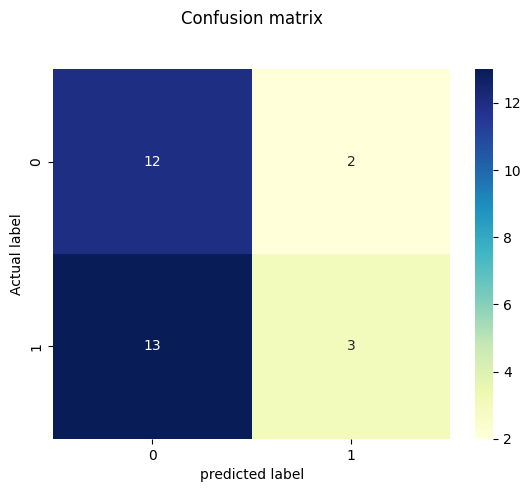

In [15]:
sns.heatmap(pd.DataFrame(cf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('predicted label')


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5

In [17]:
target_names = ['Not oriented','Oriented']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not oriented       0.48      0.86      0.62        14
    Oriented       0.60      0.19      0.29        16

    accuracy                           0.50        30
   macro avg       0.54      0.52      0.45        30
weighted avg       0.54      0.50      0.44        30



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


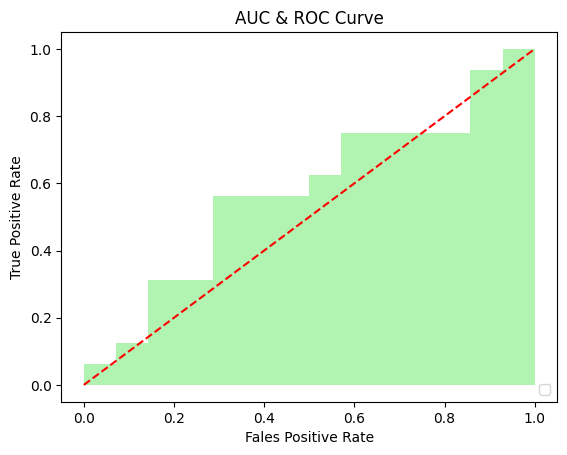

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('Fales Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr,tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.show()

In [ ]:
X_with_constant = sm.add_constant(df[["Age"]].values)

y = df[['']].values

# performing the regression
result = sm.OLS(y,X_with_constant).fit()

# Result of statsmodels
print(result.summary())